# Coverage for likelihood contour and approximations

#### Adapted from an [iMinuit tutorial](https://github.com/scikit-hep/iminuit/blob/master/tutorial/hesse_and_minos.ipynb)

## Using the Hessian (Minuit's HESSE)

The matrix of the second derivatives of the likelihood is made by the elements of the Fisher Information Matrix $I(\theta)$.

In the asymptotic limit, a MLE $\hat\theta$ normally distributed, and with the minimum variance given by the Cramer-Rao-Frechet bound. 

Remember that the limit of minimum variance is reached only asymptotically by the MLE, because the MLE estimator is unbiased only asymptotically.

$$
V(\hat \theta) \underset{n\rightarrow \infty}{\longrightarrow} \left\{ -n E\left[\frac{\partial^2 \ln\! f(x;\theta)}{\partial \theta^2} \right]_{\theta = \hat\theta} \right\}^{-1}
$$

The expectation value is constant, and the variance will therefore scale down with $\frac{1}{n}$ in the asymptotic limit.


Under general conditions (data range independent of $\theta$), we can swap integration over $x$ and differentiation with respect to $\theta$. Doing this and replacing the expectation with its plug-in estimate, the arithmetic average, we obtain:

$$
-n E\left[\frac{\partial^2 \ln\! f(x;\theta)}{\partial \theta^2} \right]_{\theta = \hat \theta} = -n \frac{1}{n} \sum_i \frac{\partial^2 \ln\! f(x_i; \theta)}{\partial \theta^2}\Big\vert_{\theta = \hat \theta} = \frac{\partial^2 \big(-\sum_i \ln\! f(x_i; \theta)\big)}{\partial \theta^2}\Big\vert_{\theta = \hat \theta}
$$

The numerator now contains the negative log-likelihood function that is what in practice plug into Minuit. If there is a vector of parameters $\hat{\vec \theta}$, then this turns into the Hessian matrix of second derivatives.

Calculating this matrix is the core of the HESSE approach of Minuit. However, it relies on the asymptotic limit for the variance of the estimator, and it is exact only for normally-distributed data. The finite sample limit might converge only slowly. On top of that, the expectation of the likelihood is replaced with the sample mean of the likelihood.


### Using MINOS (profile likelihood scan)

With MINOS we scan the likelihood along one parameter $\theta_i$, while minimizing the likelihood with respect to all other parameters $\theta_k$ with $k \ne i$. This is effectively the same as expressing the other parameter estimates as a function of $\theta_i$, $\hat \theta_k(\theta_i)$, and scanning the now one-dimensional negative log-likelihood $-\ln \mathcal{L}(\theta_i; \theta_k = \hat \theta_k(\theta_i) , k\ne i)$. In other word, we scan along one parameter by setting all the other parameters to their conditional MLE (i.e. the MLE calculated for each value of $\theta_i$ that we are scanning).

We follow the likelihood curve until $-\ln \mathcal{L}$ increases by -1/2 with respect to its minimum and stores the two corresponding values $\theta^d_i$ and $\theta^u_i$. The interval $(\theta^d_i, \theta^u_i)$ has $68\,\%$ coverage probability in the asymptotic limit. In multi-dimensional parameter space, the computation is comparably expensive due to the iterative steps of scanning and minimization, but we still compute the crossings with the -1/2 $\Delta\ln\ell(\theta)$.

The likelihood ratio is $\ell(\vec\theta) = \mathcal{L}(\vec\theta) / \mathcal{L}(\hat{\vec\theta})$. In the asymptotic limit, $-2 \ln \ell(\vec\theta)$ is $\chi^2(k)$ distributed, where $k$ is the number of fitted parameters. For $k = 1$, the $\chi^2$-interval $[0, 1)$ contains $68\,\%$ probability. For a single parameter fit therefore a corresponding interval is found by the two values $\theta^d$ and $\theta^u$ which solve

$$
-2\ln\ell(\theta) = 1 \Leftrightarrow -\ln\ell(\theta) = 1/2
$$

As mentioned yesterday, the MINOS intervals are *not exact*: for finite samples the intervals do not necessarily have $68\,\%$ coverage probability, only in the asymptotic limit. This is because the likelihood ratio test statistic is not exactly $\chi^2$-distributed (only in the asymptotic limit of the Wilks theorem).

So in a sense there are two different asymptotic effects:
- the effect that makes it so that approximating the likelihood with a gaussian is exact only to order $1/n$
- the effect that makes it so that even when we are not approximating the likelihood we are in any case assuming it is $\chi^2$-distributed.



# Coverage probability of HESSE and MINOS intervals in toy experiments

## Poisson distributed data

We construct HESSE and MINOS intervals for a counting experiment. We consider the extreme case of a single observation $k$ drawn from a Poisson distribution $P(k;\lambda)$. We use the maximum-likelihood method to find the best estimate for $\lambda$ for each $k$ under the constraint $\lambda > 0$, which is trivially just $\hat \lambda = k$, and construct intervals with the HESSE and MINOS algorithms to check their coverage.

This case can be fully handled analytically, but here we use iminuit's HESSE and MINOS algorithms to compute the intervals.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal
from argparse import Namespace
from iminuit import Minuit
import iminuit
print(iminuit.__version__)

1.5.4


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 1.554e-15                  │         Nfcn = 24 (24 total)         │
│ EDM = 1.57e-15 (Goal: 0.0001)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │       SOME Parameters at limit       │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 1                          │         Nfcn = 24 (24 total)         │
│ EDM = 3.14e-11 (Goal: 0.0001)    │                                      │
├───────────

<ipython-input-3-6966c18bb8f7>:12: RuntimeWarning: divide by zero encountered in log
  return lambd - k * np.log(lambd)
<ipython-input-3-6966c18bb8f7>:12: RuntimeWarning: invalid value encountered in double_scalars
  return lambd - k * np.log(lambd)


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -4.751                     │         Nfcn = 18 (18 total)         │
│ EDM = 1.67e-10 (Goal: 0.0001)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │       SOME Parameters at limit       │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -6.621                     │         Nfcn = 18 (18 total)         │
│ EDM = 9.28e-11 (Goal: 0.0001)    │                                      │
├───────────

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -46                        │         Nfcn = 16 (16 total)         │
│ EDM = 9.67e-08 (Goal: 0.0001)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │       SOME Parameters at limit       │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -42.93                     │         Nfcn = 16 (16 total)         │
│ EDM = 1.22e-07 (Goal: 0.0001)    │                                      │
├───────────

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -126.3                     │         Nfcn = 13 (13 total)         │
│ EDM = 5.47e-06 (Goal: 0.0001)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │       SOME Parameters at limit       │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -122.5                     │         Nfcn = 13 (13 total)         │
│ EDM = 5.85e-06 (Goal: 0.0001)    │                                      │
├───────────

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -270.6                     │         Nfcn = 13 (13 total)         │
│ EDM = 9.71e-07 (Goal: 0.0001)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │       SOME Parameters at limit       │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -253.1                     │         Nfcn = 13 (13 total)         │
│ EDM = 1.13e-06 (Goal: 0.0001)    │                                      │
├───────────

└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -374.4                     │         Nfcn = 13 (13 total)         │
│ EDM = 4.52e-07 (Goal: 0.0001)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │       SOME Parameters at limit       │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -397.7                     │         Nfcn = 13 (13 total)         │
│ EDM = 3.92

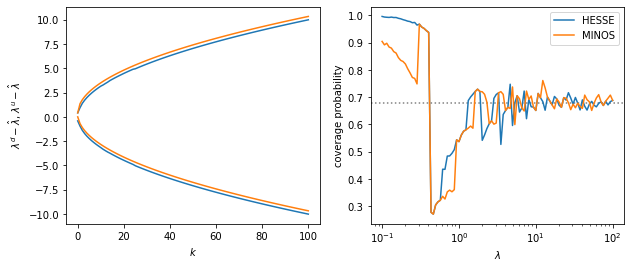

In [3]:
class MemoizedMinuit:
    """This class avoids repeated computation of the same intervals, which only depend on k."""

    def __init__(self):
        self._results = {}

    def __call__(self, k):
        r = self._results.get(k, None)
        if r is None:

            def nll(lambd):
                return lambd - k * np.log(lambd)

            m = Minuit(nll, lambd=k + 1, limit_lambd=(0, None), errordef=1)
            m.print_level=1
            #m.fitarg['limit_lambd'] = (0, None)
            # Newer versions may use: m.limits["lambd"] = (0, None)
            m.errordef = 0.5
            m.migrad()
            m.hesse()
            m.minos()
            assert m.valid

            p = m.values["lambd"]
            dp = m.errors["lambd"]
            pm = max(p + m.merrors["lambd"].lower, 0.0), p + m.merrors["lambd"].upper

            r = p, dp, *pm
            self._results[k] = r

        return r


rng = np.random.default_rng(seed=1)
nmc = 5000
mu = 10 ** np.linspace(-1, 2, 100)

m = MemoizedMinuit()

pcov = {
    "HESSE": np.empty_like(mu),
    "MINOS": np.empty_like(mu),
}

for i, mui in enumerate(mu):

    nh = 0
    nm = 0
    for imc in range(nmc):
        k = rng.poisson(mui)

        p, dp, pd, pu = m(k)

        if p - dp < mui < p + dp:
            nh += 1
        if pd < mui < pu:
            nm += 1

    pcov["HESSE"][i] = nh / nmc
    pcov["MINOS"][i] = nm / nmc

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

plt.sca(ax[0])
n = np.arange(101)
interval = {
    "HESSE": np.empty((len(n), 2)),
    "MINOS": np.empty((len(n), 2)),
}
for i, k in enumerate(n):
    p, dp, pd, pu = m(k)
    interval["HESSE"][i] = (p - dp, p + dp)
    interval["MINOS"][i] = (pd, pu)

for algo, vals in interval.items():
    plt.plot(n, vals[:, 0] - n, color="C0" if algo == "HESSE" else "C1", label=algo)
    plt.plot(n, vals[:, 1] - n, color="C0" if algo == "HESSE" else "C1", label=algo)
plt.xlabel("$k$")
plt.ylabel(r"$\lambda^d - \hat\lambda$, $\lambda^u - \hat\lambda$")

plt.sca(ax[1])
for algo, vals in pcov.items():
    plt.plot(mu, vals, label=algo)

plt.axhline(0.68, ls=":", color="0.5", zorder=0)
plt.xlabel(r"$\lambda$")
plt.ylabel("coverage probability")
plt.legend()
plt.semilogx();